In [3]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

# Baseline models from the MNIST example in Deep Learning with Python (Chollet, 2018)

- **DNN**

- **CNN**

In [12]:
# Load data and split into training and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
def build_DNN():

    network = tf.keras.Sequential()
    network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
    network.add(layers.Dense(10, activation = 'softmax'))
    
    network.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
    
    return network

In [15]:
# Preprocess data into shape that network expects and transform it from range 0-255 to range 0-1
train_images = train_images.reshape((60000, 28 * 28))/255
test_images = test_images.reshape((10000, 28 * 28))/255

In [16]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0496 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9891


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 671us/step - loss: 0.0679 - accuracy: 0.9795


Randomly sampling a subset of the data, to make the combinations more tractable. 

In [18]:
combo_train_X.shape

(100000, 28, 56)

In [19]:
# Reshape the data so they can be fed into the network, one-hot-encode the labels

train_images = combo_train_X.reshape((combo_train_X.shape[0], 28, 56, 1))
train_images = train_images/ 255

val_images = combo_val_X.reshape((combo_val_X.shape[0], 28, 56, 1))
val_images = val_images/255

train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)

In [20]:
# Model architecture

# Convolutional NN
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,56,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# Adding a NN Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 12, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 10, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [21]:
# Compile model
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.0002)
# model.compile(optimizer = opt,
#              loss = 'categorical_crossentropy',
#              metrics = ['mae', 'accuracy'])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Fit model
model.fit(train_images, 
          train_labels, 
          epochs = 5, 
          batch_size = 64)


Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 0.2618 - accuracy: 0.9167
Epoch 2/5
1563/1563 [==============================] - 103s 65ms/step - loss: 0.0626 - accuracy: 0.9803
Epoch 3/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 4/5
1563/1563 [==============================] - 79s 51ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 5/5
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0152 - accuracy: 0.9955


In [23]:
# Create a set of predictions
y_predict = model.predict(val_images)

In [24]:
# Compare predictions to validation labels and return the proportion correctly classified
correct = 0

for label in range(len(val_labels)):
    
    if np.argmax(val_labels[label], axis=None, out=None) == np.argmax(y_predict[label], axis=None, out=None):
        correct = correct + 1
        
print("Val Accuracy: " + str(correct/len(val_labels)))

Val Accuracy: 0.9826


In [ ]:
# Print loss, mae and accuracy
eval_model = model.evaluate(val_images, val_labels)
eval_model

In [38]:
# serialize model to JSON
model_json = model.to_json()
with open("Trained_Models/Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Trained_Models/Model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
# Verify above by visually inspecting images from the predicted set
num_val_images = 10000

Predicted: 5
True: 7


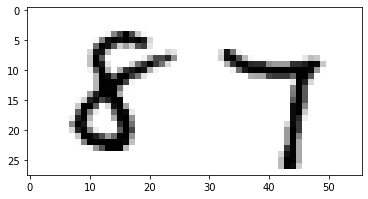

In [21]:
# Run this cell repeatedly to see multiple examples
check_index = random.randint(0,num_val_images)
plt.imshow(val_images[check_index].reshape(28,56), cmap = plt.cm.binary)
print("Predicted: " + str(np.argmax(y_predict[check_index])))
print("True: " + str(np.argmax(val_labels[check_index])))